In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.ticker as mtick
from stats import median

In [2]:
#Load data file
file = "data/dataset-of-10s.csv"
spotify_billboards_df = pd.read_csv(file)
spotify_billboards_df = spotify_billboards_df.drop(columns=["uri"])
spotify_billboards_df.head()

,track,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Wild Things,Alessia Cara,0.741,0.626,1,-4.826,0,0.0886,0.02000,0.000,0.0828,0.706,108.029,188493,4,41.18681,10,1
1,Surfboard,Esquivel!,0.447,0.247,5,-14.661,0,0.0346,0.87100,0.814,0.0946,0.250,155.489,176880,3,33.18083,9,0
2,Love Someone,Lukas Graham,0.550,0.415,9,-6.557,0,0.0520,0.16100,0.000,0.1080,0.274,172.065,205463,4,44.89147,9,1
3,Music To My Ears (feat. Tory Lanez),Keys N Krates,0.502,0.648,0,-5.698,0,0.0527,0.00513,0.000,0.2040,0.291,91.837,193043,4,29.52521,7,0
4,Juju On That Beat (TZ Anthem),Zay Hilfigerrr & Zayion McCall,0.807,0.887,1,-3.892,1,0.2750,0.00381,0.000,0.3910,0.780,160.517,144244,4,24.99199,8,1


In [3]:
#Cleaning Data

#Convert duration to seconds
spotify_billboards_df["duration_ms"] = round((spotify_billboards_df["duration_ms"] / 1000), 0)
spotify_billboards_df_new = spotify_billboards_df.rename(columns={'duration_ms': 'duration_seconds'})

chorus_hit_p = round((100 * spotify_billboards_df_new["chorus_hit"] / spotify_billboards_df_new["duration_seconds"]), 1)
hit_flop = spotify_billboards_df_new["target"]



# Chorus Hit

In [4]:
chorus_hit_p

0       21.9
1       18.7
2       21.9
3       15.3
4       17.4
        ... 
6393    16.1
6394    21.4
6395     9.1
6396    10.2
6397    20.8
Length: 6398, dtype: float64

In [5]:
#chorus hit percentage into song
chorus_hit_p_df = pd.DataFrame({
    "Chorus Percent Into Song":chorus_hit_p,
    "Hit or Flop":spotify_billboards_df_new["target"]
})


In [6]:
#binning chorus hit percent
bins = [0, 4, 9, 14, 19, 29, 104]
bin_ranges = ["<5%","5%-9%","10%-%14","15%-19%","20%-29%","30% +"]
chorus_hit_p_df["Chorus Hit Into Song"] = pd.cut(chorus_hit_p_df["Chorus Percent Into Song"], bins, labels=bin_ranges)
chorus_hit_p_df = chorus_hit_p_df.groupby(['Hit or Flop', 'Chorus Hit Into Song']).count()["Chorus Percent Into Song"]

chorus_hit_p_df.rename(index={0:'Flop', 1:'Hit'}, inplace=True)
chorus_hit_p_df

Hit or Flop  Chorus Hit Into Song
Flop         <5%                      30
             5%-9%                   399
             10%-%14                 822
             15%-19%                 728
             20%-29%                 699
             30% +                   514
Hit          <5%                       1
             5%-9%                   194
             10%-%14                 921
             15%-19%                 886
             20%-29%                 858
             30% +                   339
Name: Chorus Percent Into Song, dtype: int64

In [7]:
#cleaning chorus hit percent
chorus_hit_p_df = pd.DataFrame(chorus_hit_p_df)
chorus_hit_p_df["Chorus Percent Into Song"] = chorus_hit_p_df["Chorus Percent Into Song"].fillna(0)
chorus_hit_p_df = chorus_hit_p_df.rename(columns={"Chorus Percent Into Song": "Count Percentage"})
total_counts = chorus_hit_p_df.groupby(['Hit or Flop']).sum()["Count Percentage"]

chorus_hit_p_df["Count Percentage"] = round((100 * chorus_hit_p_df["Count Percentage"] / total_counts),1)

In [8]:
#Cleaning chorus_hit_p_df

#filtering flops and hits
flops = chorus_hit_p_df.loc["Flop"]
hits = chorus_hit_p_df.loc["Hit"]

#exctracting labels
labels =  list(chorus_hit_p_df.loc["Flop"].index)

#extracting flop/hit values 
flops_values = [data[0] for data in flops.values]
hit_values = [ data[0] for data in hits.values ]

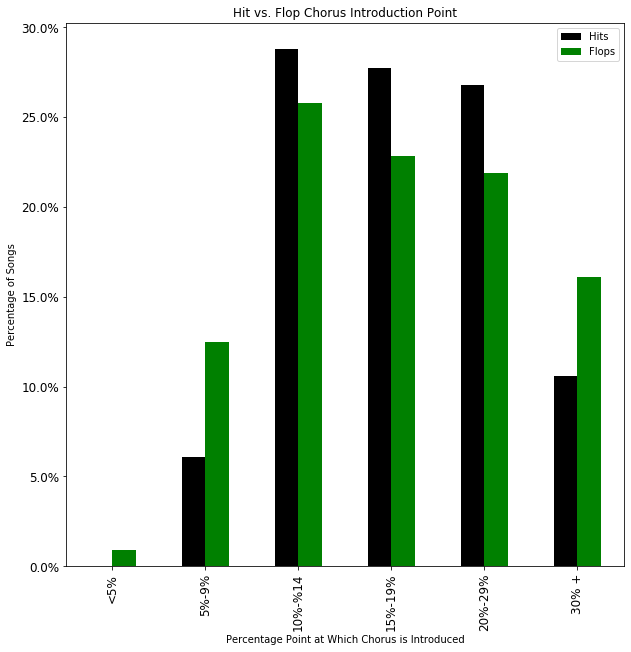

In [9]:
#new DF with columns for flops and hits
df = pd.DataFrame({'Hits': hit_values, 'Flops': flops_values}, index=labels)

#bar chart comparing flop and hit chorus starting point
ax = df.plot(kind='bar', color=['black', 'green'], figsize=(10,10), fontsize=12)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

#Labels
title = "Hit vs. Flop Chorus Introduction Point"
plt.title(title)
plt.ylabel("Percentage of Songs")
plt.xlabel("Percentage Point at Which Chorus is Introduced")
#df.plot.bar(kind="bar", figsize=(20,10))

#Save & Show
plt.savefig("output/" + title + ".png")
plt.show()

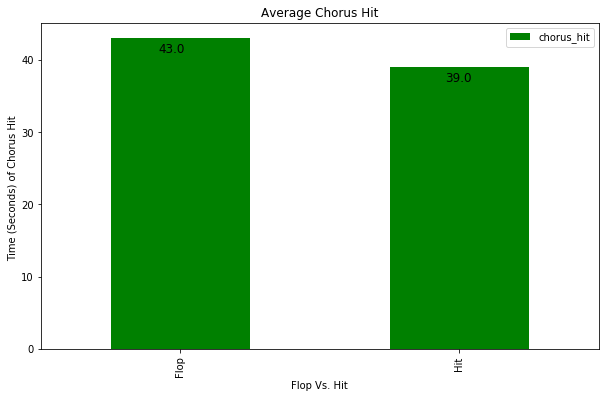

In [45]:
# average chorus hit per target
average_hit_df = spotify_billboards_df.groupby(["target"]).mean()["chorus_hit"]
average_hit_df = pd.DataFrame(average_hit_df.round(0))
average_hit_df.rename(index={0:'Flop', 1:'Hit'}, inplace=True)
average_hit_df = average_hit_df.rename(index={'0': "Flop"})


#Exctracting average values
chorus_hit_mean = average_hit_df.loc["Hit"]
chorus_hit_mean = chorus_hit_mean["chorus_hit"]
chorus_flop_mean = average_hit_df.loc["Flop"]
chorus_flop_mean = chorus_flop_mean["chorus_hit"]

#Bar Chart
average_hit_df.plot(kind="bar", color=["green"], figsize=(10, 6))

#Annotate
plt.annotate(chorus_flop_mean,(-.08,41),fontsize=12,color="black")
plt.annotate(chorus_hit_mean,(.95,37),fontsize=12,color="black")

#labels
title = "Average Chorus Hit"
plt.title(title)
plt.ylabel("Time (Seconds) of Chorus Hit ")
plt.xlabel("Flop Vs. Hit")

#save & show
plt.savefig("output/" + title + ".png")
plt.show()


# Danceability 

In [ ]:
spotify_billboards_df_new

In [ ]:
#extract columns
danceability = spotify_billboards_df_new["danceability"]
target = spotify_billboards_df_new["target"]
tempo = spotify_billboards_df_new["tempo"]
energy = spotify_billboards_df_new["energy"]
live = spotify_billboards_df_new["liveness"]
sections = spotify_billboards_df_new["sections"]

#danceability & tempo DF
dance_tempo_df = pd.DataFrame({"Outcome": target, "Tempo": tempo, "Danceability": danceability, "Energy": energy, "Live": live, "Sections": sections})
dance_tempo_df = dance_tempo_df.set_index("Outcome")
dance_tempo_df.rename(index={0:'Flop', 1:'Hit'}, inplace=True)
dance_tempo_df




In [ ]:
#Hit Danceability
hit_danceability = dance_tempo_df.loc["Hit"]
hit_danceability = hit_danceability["Danceability"].values
hit_danceability_average = round(hit_danceability.mean(), 2)

#flop_danceability
flop_danceability = dance_tempo_df.loc["Flop"]
flop_danceability = flop_danceability["Danceability"].values
flop_danceability_average = round(flop_danceability.mean(), 2)

#average results
hit_results = ("Hit Average = " + str(hit_danceability_average))
flop_results = ("Flop Average = " + str(flop_danceability_average))

#Hit Danceability Box plot
plt.boxplot([hit_danceability, flop_danceability], labels = ["Hits", "Flops"])
title = "Danceability"
plt.annotate(hit_results,(1.2,.7),fontsize=10,color="black")
plt.annotate(flop_results,(1.2,.5),fontsize=10,color="black")
plt.title(title)
plt.ylabel("Danceability Rating")
plt.savefig("output/" + title + ".png")
plt.show()

In [ ]:
dance_tempo_df

In [ ]:
#scatter plot tempo compared to dancibility

#Extract columns
tempo = dance_tempo_df["Tempo"]
tempo = round(tempo, 0)

danceability = dance_tempo_df["Danceability"]
danceability = round(danceability, 2)

#Plot
plt.scatter(tempo, danceability, edgecolor="black", marker=".", alpha=0.8, label="Cities")

#Labels
title = "Tempo vs Danceability"
plt.title(title)
plt.xlabel("Tempo (BPM)")
plt.ylabel("Danceability")

#Save & Show
plt.savefig("output/" + title + ".png")
plt.show()

In [ ]:
#Scatter plot energy vs Danceabiltiy

#exctract energy
energy = dance_tempo_df["Energy"]
energy = round(energy, 2)

#plot
plt.scatter(energy, danceability, edgecolor="black", marker=".", alpha=0.8, label="Cities")

#labels
title = "Energy vs Danceability"
plt.title(title)
plt.xlabel("Energy")
plt.ylabel("Danceability")

#save & show
plt.savefig("output/" + title + ".png")
plt.show()

In [ ]:
#Scatter plot liveness vs Danceabiltiy

#exctract liveness
live = dance_tempo_df["Live"]
live = round(live, 2)

#plot
plt.scatter(live, danceability, edgecolor="black", marker=".", alpha=0.8, label="Cities")

#Labels
title = "Liveness vs Danceability"
plt.title(title)
plt.xlabel("Liveness")
plt.ylabel("Danceability")

#save & show
plt.savefig("output/" + title + ".png")
plt.show()

In [ ]:
#Scatter plot sections vs Danceabiltiy

#exctract energy
sections = dance_tempo_df["Sections"]

#plot
plt.scatter(sections, danceability, edgecolor="black", marker=".", alpha=0.8, label="Cities")

#Labels
title = "Sections vs Danceability"
plt.title(title)
plt.xlabel("Sections")
plt.ylabel("Danceability")

#Save & Show
plt.savefig("output/" + title + ".png")
plt.show()

# Human Element

In [ ]:
#spotify_billboards_df_new
acoustic = spotify_billboards_df_new["acousticness"]
live = spotify_billboards_df_new["liveness"]
target = spotify_billboards_df_new["target"]
human_element_df = pd.DataFrame({
    "acousticness": acoustic,
    "liveness": live,
    "target": target
})
human_element_df = human_element_df.set_index("target")
human_element_df.rename(index={0:'Flop', 1:'Hit'}, inplace=True)

human_element_df

In [ ]:
#Acoustic and live hit totals

#Acoustic hits rating of .80 or higher
acoustic_hits = human_element_df.loc["Hit"]
total_hits = len(acoustic_hits.index)

#Average acoustic rating
average_acoustic_rating = round(acoustic_hits["acousticness"].mean(), 2)

#Total acoustic tracks 
acoustic_hits = acoustic_hits["acousticness"].loc[acoustic_hits["acousticness"] >= .80]
total_acoustic_hits = len(acoustic_hits.index)

#percentage acoustic hits
percent_acoustic_hits = 100 * round((total_acoustic_hits / total_hits), 3)

#Live Hits rating of .80 or higher
live_hits = human_element_df.loc["Hit"]

#Average live rating
average_live_rating = round(live_hits["liveness"].mean(), 3)

#Total Live tracks
live_hits = live_hits["liveness"].loc[live_hits["liveness"] >= .80]
total_live_hits = len(live_hits.index)

#percentage_live_hits
percent_live_hits = 100 * round((total_live_hits / total_hits), 3)

#Hits that are both live and acoustic 
#acoustic_live_hits = human_element_df.loc["Hit"]
#acoustic_live_hits = acoustic_live_hits["liveness"].loc[(acoustic_live_hits["liveness"] >= .80) & (acoustic_live_hits["acousticness"] >= .80)]
#acoustic_live_hits.head()

print("Total Hits = " + str(total_hits))
print("Total acoustic hits = " + str(total_acoustic_hits))
print("Total live Hits = " + str(total_live_hits))
print("Average Acoustic Rating = " + str(average_acoustic_rating))
print("Average live Rating = " + str(average_live_rating))

In [ ]:
#Acoustic and live flop totals

#Acoustic hits rating of .80 or higher
acoustic_flops = human_element_df.loc["Flop"]
total_flops = len(acoustic_flops.index)

#Average acoustic rating
average_acoustic_rating = round(acoustic_flops["acousticness"].mean(), 2)

#Total acoustic tracks 
acoustic_flops = acoustic_flops["acousticness"].loc[acoustic_flops["acousticness"] >= .80]
total_acoustic_flops = len(acoustic_flops.index)

#percent acoustic flops
percent_acoustic_flops = round(100 * (total_acoustic_flops / total_flops), 3)

#Live flops rating of .80 or higher
live_flops = human_element_df.loc["Flop"]

#Average live rating
average_live_rating_flop = round(live_flops["liveness"].mean(), 3)

#Total Live tracks
live_flops = live_flops["liveness"].loc[live_flops["liveness"] >= .80]
total_live_flops = len(live_flops.index)

#Percentage live flops
percent_live_flops = 100 * round((total_live_flops / total_flops), 3)

print("Total flops = " + str(total_flops))
print("Total acoustic flops = " + str(total_acoustic_flops))
print("Total live flops = " + str(total_live_flops))
print("Average Acoustic Rating = " + str(average_acoustic_rating))
print("Average live Rating = " + str(average_live_rating_flop))
print("Percent live flops = " + str(percent_live_flops))
print("Percent acoustic flops = " + str(percent_acoustic_flops))

In [ ]:
#Dataframe for total
index = ["Live", "Acoustic"]
total_hits = [total_live_hits, total_acoustic_hits]
total_flops = [total_live_flops, total_acoustic_flops]

total_live_acoustic_df = pd.DataFrame({"Hits": total_hits, "Flops": total_flops}, index=index)

#dataframe for Percentages 
percent_hits = [percent_live_hits, percent_acoustic_hits]
percent_flops = [percent_live_flops, percent_acoustic_flops]

percent_live_acoustic_df = pd.DataFrame({"Hits": percent_hits, "Flops": percent_flops}, index=index)
#total_live_acoustic_df
#percent_live_acoustic_df

In [ ]:
#Reults for annotation

#Totals
live_hits = ("Total live hits = " + str(total_live_hits))
live_flops = ("Total live flops = " + str(total_live_flops))
acoustic_hits = ("Total acoustic hits = " + str(total_acoustic_hits))
acoustic_flops = ("Total acoustic hits = " + str(total_acoustic_flops))

#percentages
p_live_hits = ("Live hits = " + str(percent_live_hits) + "%")
p_live_flops = ("Live flops = " + str(percent_live_flops) + "%")
p_acoustic_hits = ("Acoustic hits = " + str(percent_acoustic_hits) + "%")
p_acoustic_flops = ("Acoustic hits = " + str(percent_acoustic_flops) + "%")

In [ ]:
#Bar chart comparing totals
total_live_acoustic_df.plot(kind="bar", color=["black", "green"], figsize=(10,6))

#labels
title = "Live and Acoustic Hit vs Flop Totals"
plt.annotate(live_hits,(-.25,450),fontsize=12,color="black")
plt.annotate(live_flops,(-.25,400),fontsize=12,color="green")
plt.annotate(acoustic_hits,(.4,450),fontsize=12,color="black")
plt.annotate(acoustic_flops,(.4,400),fontsize=12,color="green")
plt.title(title)
plt.ylabel("Total Songs")
plt.savefig("output/" + title + ".png")

In [ ]:
#bar chart comparing percentages
percent_live_acoustic_df.plot(kind="bar", color=["black", "green"], figsize=(10,6))


#labels
title = "Live and Acoustic Hit vs Flop Percentages"
plt.title(title)
plt.ylabel("Percentage of Songs")

#Annotation
plt.annotate(p_live_hits,(-.35,12),fontsize=12,color="black")
plt.annotate(p_live_flops,(-.35,10),fontsize=12,color="green")
plt.annotate(p_acoustic_hits,(.4,12),fontsize=12,color="black")
plt.annotate(p_acoustic_flops,(.4,10),fontsize=12,color="green")

#Show & Save
plt.savefig("output/" + title + ".png")
plt.show()